**INSTALLING THE LIBRARIES**

In [1]:
! pip install --quiet gdal rasterio geopandas

     |████████████████████████████████| 19.3 MB 1.2 MB/s 
     |████████████████████████████████| 1.0 MB 84.2 MB/s 
     |████████████████████████████████| 15.4 MB 43.8 MB/s 
     |████████████████████████████████| 6.3 MB 47.6 MB/s 


In [2]:
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import glob
import os
%matplotlib inline

# File and folder paths
dirpath = "/content/drive/MyDrive/stiff"
out_fp = os.path.join(dirpath, "Helsinki_DEM2x2m_Mosaic.tif")

# Make a search criteria to select the files
search_criteria = "FAS*.tif"
q = os.path.join(dirpath, search_criteria)
print(q)

/content/drive/MyDrive/stiff/FAS*.tif


In [3]:
dem_fps = glob.glob(q)

# Files that were found:
dem_fps

['/content/drive/MyDrive/stiff/FAS_Brazil1.2013363.aqua.ndvi.2km.tif',
 '/content/drive/MyDrive/stiff/FAS_Brazil2.2013363.terra.ndvi.2km.tif',
 '/content/drive/MyDrive/stiff/FAS_Brazil3.2013363.aqua.ndvi.2km.tif',
 '/content/drive/MyDrive/stiff/FAS_Brazil4.2013363.aqua.ndvi.2km.tif',
 '/content/drive/MyDrive/stiff/FAS_Brazil7.2013363.aqua.ndvi.2km.tif',
 '/content/drive/MyDrive/stiff/FAS_Brazil6.2013363.terra.ndvi.2km.tif',
 '/content/drive/MyDrive/stiff/FAS_Brazil5.2013363.aqua.ndvi.2km.tif']

OPENING THE FILES IN READ MODE USING RASTERIO 

In [4]:
# List for the source files
src_files_to_mosaic = []

# Iterate over raster files and add them to source -list in 'read mode'
for fp in dem_fps:
    src = rasterio.open(fp)
    src_files_to_mosaic.append(src)

src_files_to_mosaic

[<open DatasetReader name='/content/drive/MyDrive/stiff/FAS_Brazil1.2013363.aqua.ndvi.2km.tif' mode='r'>,
 <open DatasetReader name='/content/drive/MyDrive/stiff/FAS_Brazil2.2013363.terra.ndvi.2km.tif' mode='r'>,
 <open DatasetReader name='/content/drive/MyDrive/stiff/FAS_Brazil3.2013363.aqua.ndvi.2km.tif' mode='r'>,
 <open DatasetReader name='/content/drive/MyDrive/stiff/FAS_Brazil4.2013363.aqua.ndvi.2km.tif' mode='r'>,
 <open DatasetReader name='/content/drive/MyDrive/stiff/FAS_Brazil7.2013363.aqua.ndvi.2km.tif' mode='r'>,
 <open DatasetReader name='/content/drive/MyDrive/stiff/FAS_Brazil6.2013363.terra.ndvi.2km.tif' mode='r'>,
 <open DatasetReader name='/content/drive/MyDrive/stiff/FAS_Brazil5.2013363.aqua.ndvi.2km.tif' mode='r'>]

PLOTTING THE DIFFERENT BANDS OF THE RASTER

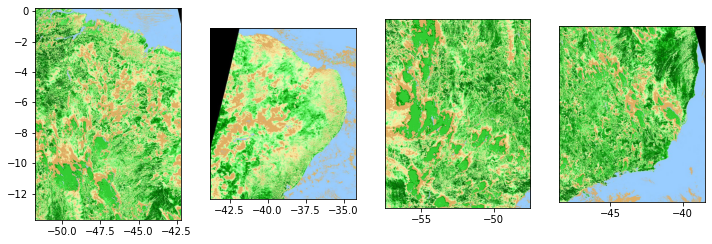

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create 4 plots next to each other
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(12, 4))

# Plot first four files
show(src_files_to_mosaic[0], ax=ax1)
show(src_files_to_mosaic[1], ax=ax2)
show(src_files_to_mosaic[2], ax=ax3)
show(src_files_to_mosaic[3], ax=ax4)

# Do not show y-ticks values in last three axis
for ax in [ax2, ax3, ax4]:
    ax.yaxis.set_visible(False)

PRINTING THE META DATA -> crs,count etc

In [6]:
src_files_to_mosaic[0].meta

{'count': 3,
 'crs': CRS.from_epsg(4326),
 'driver': 'GTiff',
 'dtype': 'uint8',
 'height': 775,
 'nodata': None,
 'transform': Affine(0.019140799999999843, 0.0, -51.784,
       0.0, -0.01798645161290308, 0.2192),
 'width': 500}

MERGING THE BANDS TO GIVE A SINGLE RASTER 

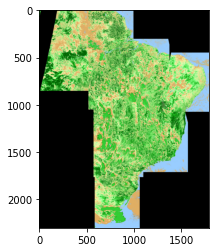

In [7]:
# Merge function returns a single mosaic array and the transformation info
mosaic, out_trans = merge(src_files_to_mosaic)

# Plot the result
show(mosaic, cmap='terrain')